In [125]:
import numpy as np
from scipy.stats import norm, multivariate_normal

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pandas as pd
%matplotlib notebook

In [126]:
%matplotlib notebook

In [127]:
'''
ML estimate or empirical mean
'''
def calculate_MLE(x_sample):
    N = x_sample.shape[0]
    muMLE = sum(x_sample)/float(N)
    s2MLE = (sum((x_sample-muMLE)**2))/float(N)
    return muMLE,s2MLE

'''
Posterior
'''
def calculate_posterior(x_sample,mu0=0.0,s20=0.5):
    N = x_sample.shape[0]
    muMLE = x_sample.mean()
    muN = mu0*s2/(N*s20+s2) + muMLE*N*s20/(N*s20+s2)
    s2N = 1./(1./s20+N/s2)
    return muN,s2N

### Import example univariate dataset of fries
Source: https://bookdown.org/pkaldunn/DataFiles/WeightFries.html

In [128]:
df = pd.read_csv('../L1/fries.csv')
df.head(n=5)

,Wt
0,117.0
1,126.0
2,128.0
3,132.0
4,133.0


In [129]:
x_sample = df['Wt'].values
muMLE,s2MLE = calculate_MLE(x_sample)

mu0 = 145
s20 = 100
muN,s2N = calculate_posterior(x_sample,mu0=mu0,s20=s20)

<IPython.core.display.Javascript object>


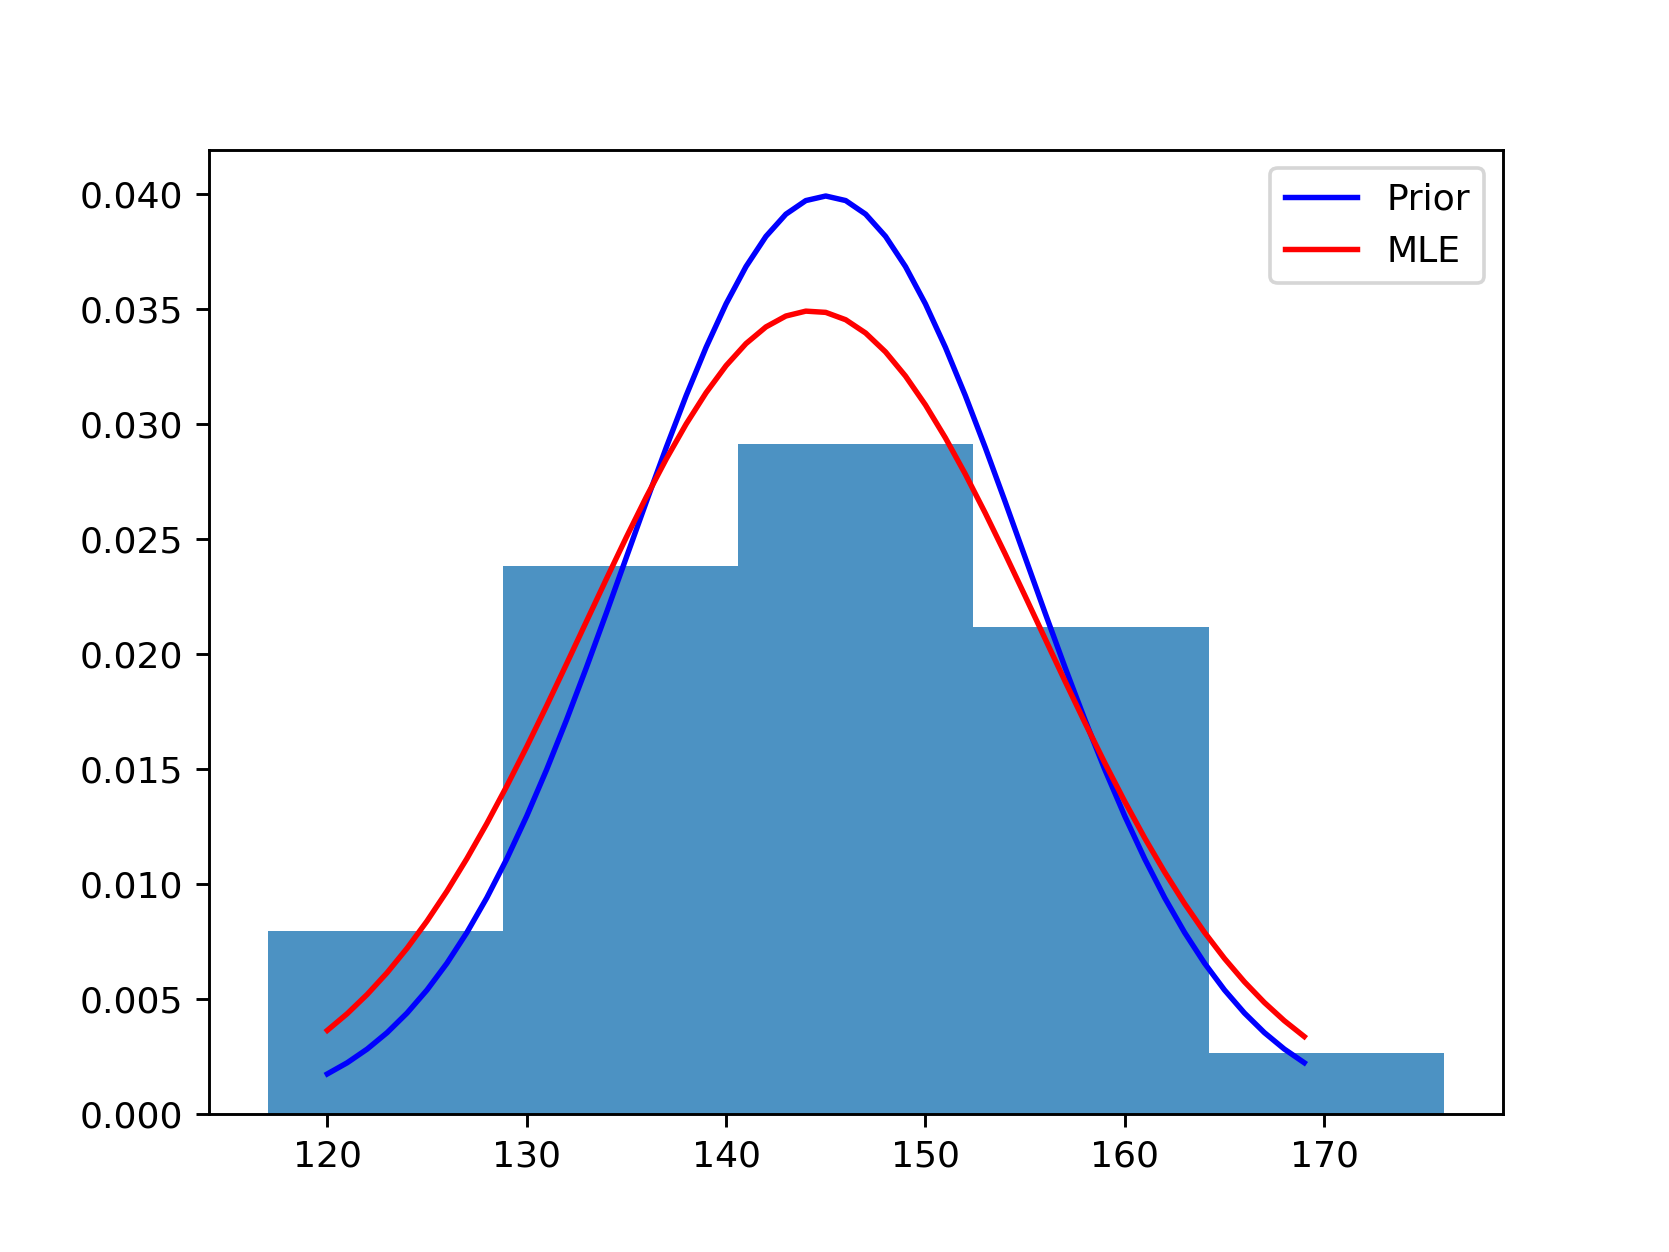

In [131]:
plt.figure()


plt.hist(x_sample,bins=5, alpha=0.8,density=True)

x_axis = np.arange(120,170,1)

plt.plot(x_axis, norm.pdf(x_axis,mu0,np.sqrt(s20)),c='b',label='Prior')
plt.plot(x_axis, norm.pdf(x_axis,muMLE,np.sqrt(s2MLE)),c='r',label='MLE')
# plt.plot(x_axis, norm.pdf(x_axis,muN,np.sqrt(s2N)),c='g',label='Posterior')
plt.legend()

### Another example: pizza
Source: https://www.tandfonline.com/doi/suppl/10.1080/10691898.2012.11889637?scroll=top

In [132]:
df = pd.read_csv('pizzasize.csv')
df.head(n=5)

,ID,Store,CrustDescription,Topping,Diameter
0,1,Dominos,ThinNCrispy,Supreme,29.40
1,2,Dominos,ThinNCrispy,BBQMeatlovers,29.63
2,3,Dominos,DeepPan,Hawaiian,27.06
3,4,Dominos,ThinNCrispy,Supreme,27.45
4,5,Dominos,ClassicCrust,Hawaiian,26.59


In [133]:
x_sample = df['Diameter'].values

<IPython.core.display.Javascript object>


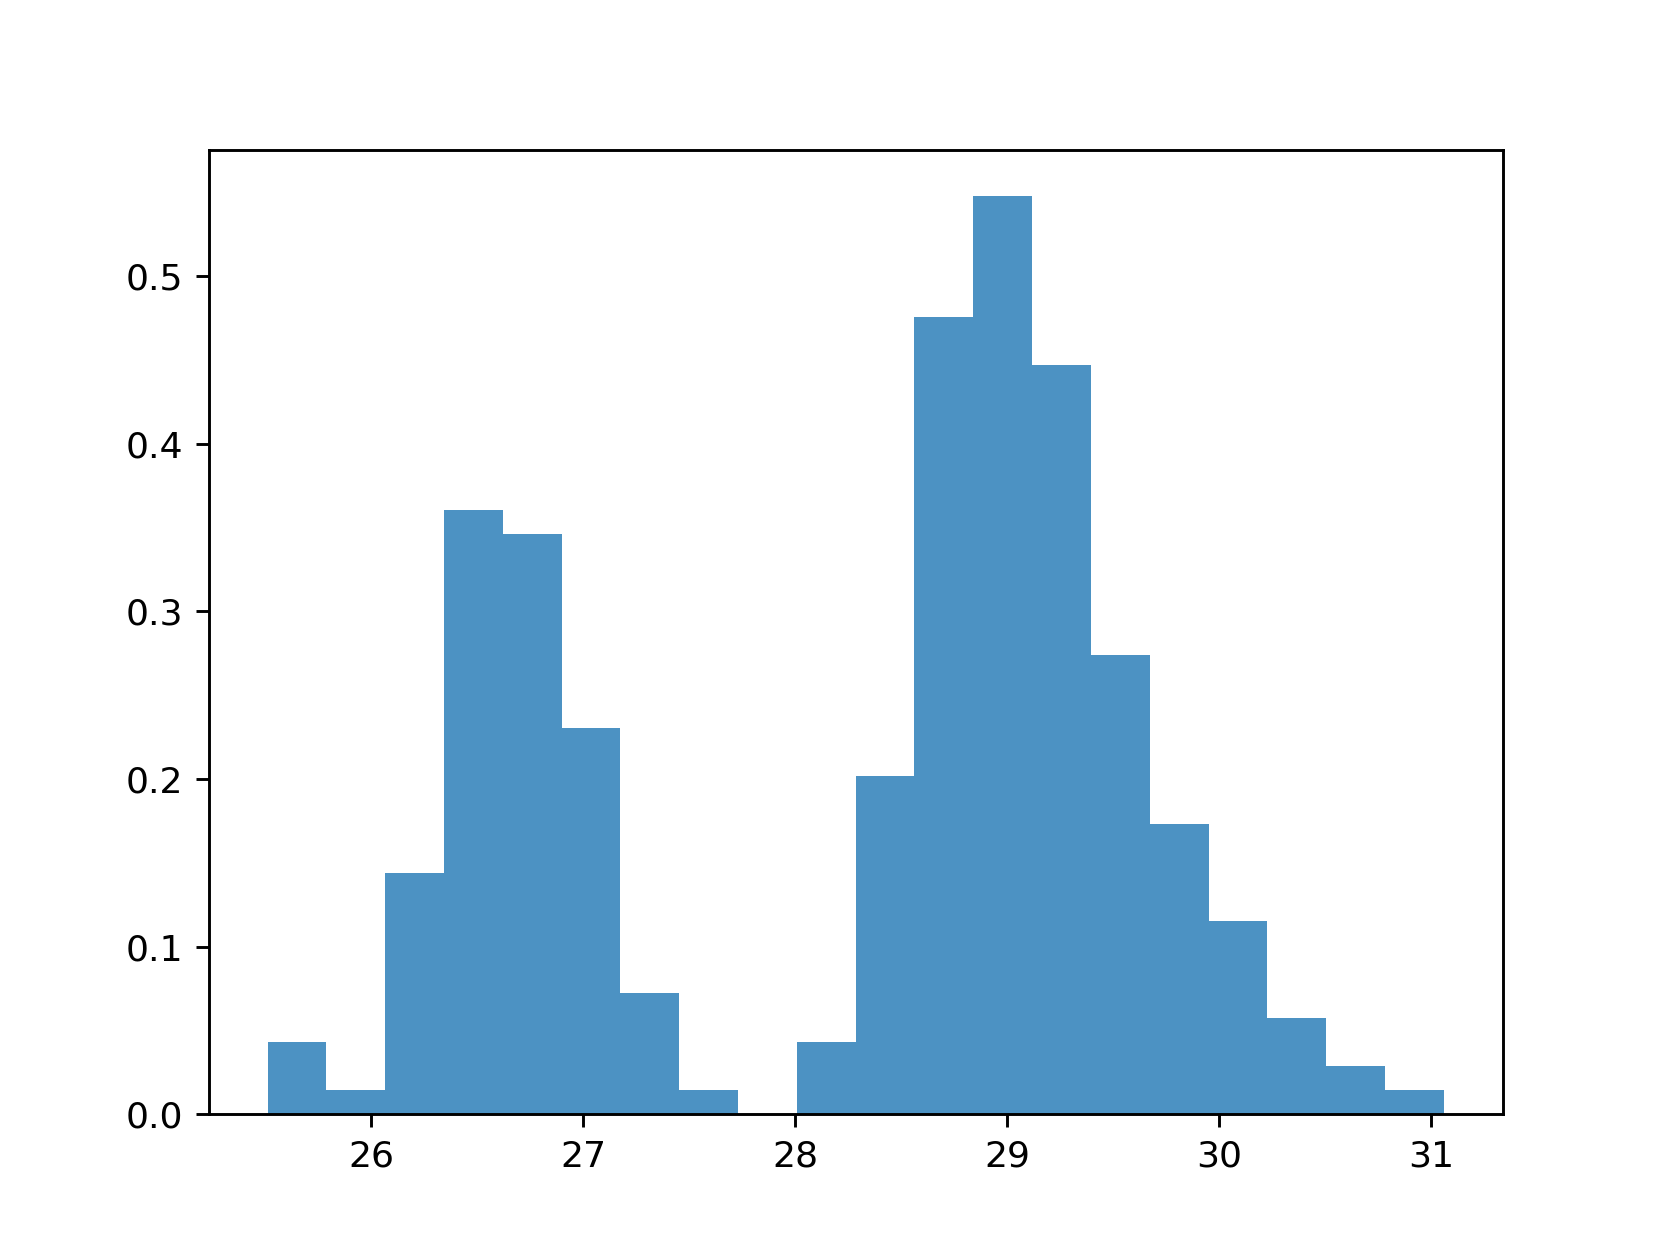

(array([0.04324324, 0.01441441, 0.14414414, 0.36036036, 0.34594595,
        0.23063063, 0.07207207, 0.01441441, 0.        , 0.04324324,
        0.2018018 , 0.47567568, 0.54774775, 0.44684685, 0.27387387,
        0.17297297, 0.11531532, 0.05765766, 0.02882883, 0.01441441]),
 array([25.51  , 25.7875, 26.065 , 26.3425, 26.62  , 26.8975, 27.175 ,
        27.4525, 27.73  , 28.0075, 28.285 , 28.5625, 28.84  , 29.1175,
        29.395 , 29.6725, 29.95  , 30.2275, 30.505 , 30.7825, 31.06  ]),
 <a list of 20 Patch objects>)

In [134]:
plt.figure()
plt.hist(x_sample,bins=20, alpha=0.8,density=True)

In [117]:
mu0 = x_sample.mean()
s20 = 1

In [121]:
muMLE,s2MLE = calculate_MLE(x_sample)

muN,s2N = calculate_posterior(x_sample,mu0=mu0,s20=s20)
muMLE,muN,mu0

(28.3082, 28.308200000000006, 28.308200000000003)

In [122]:
x_axis = np.arange(24,31,0.1)

plt.plot(x_axis, norm.pdf(x_axis,mu0,np.sqrt(s20)),c='b',label='Prior')
plt.plot(x_axis, norm.pdf(x_axis,muMLE,np.sqrt(s2MLE)),c='r',label='MLE')
plt.plot(x_axis, norm.pdf(x_axis,muN,np.sqrt(s2N)),c='g',label='Posterior')
plt.legend()

Extra: variance MLE estimator is biased, but can be corrected by multiplying by N / (N-1)

In [123]:
N = x_sample.shape[0]

In [124]:
np.sqrt(s2MLE),np.sqrt(s2MLE*N/(N-1)),df['Diameter'].std()

(1.2738211648422237, 1.2763764756648102, 1.2763764756648104)